**Imports des données**

In [1]:
import numpy as np
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename_path = 'data/df.csv'
df = pd.read_csv(filename_path)

**Parametres divers**

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 100)

**Fonctions utilisateurs**

In [3]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance

def get_metrics(y_true, y_pred, index , decimals=3):
    
    """
    Calcul de toutes les métriques de Regression
    

            Parameters
            ----------
            
            y_true : array-like
                valeurs observées
            y_pred : array-like
                valeurs prédites
            index : string
                nom/valeur de l'index
            decimals: number
                valeur de précision d'arrondissement des metriques

            Returns
            ----------
            
            metrics : DataFrame
                Renvoie les metriques de régression

    """  
    dict_metrics = {}
    
    results = pd.DataFrame({"asbolute_errors":np.abs(y_true-y_pred),"normalized_errors":np.abs(y_true-y_pred)})
    df = results.describe(percentiles=[0.05, 0.25,0.50, 0.75, 0.95])
    
    dict_metrics["Min"]=df.loc["min","asbolute_errors"]
    dict_metrics["5%"]=df.loc["5%","asbolute_errors"]
    dict_metrics["25%"]=df.loc["25%","asbolute_errors"]
    dict_metrics["50%"]=df.loc["50%","asbolute_errors"]
    dict_metrics["75%"]=df.loc["75%","asbolute_errors"]
    dict_metrics["95%"]=df.loc["95%","asbolute_errors"]
    dict_metrics["Max"]=df.loc["max","asbolute_errors"]    
    
    #dict_metrics['explained_variance_score']=explained_variance_score(y_true,y_pred)
    #dict_metrics['max_error']=max_error(y_true,y_pred)
    #dict_metrics['mean_absolute_error']=mean_absolute_error(y_true,y_pred)
    #dict_metrics['normalized_mean_absolute_error']=mean_absolute_error(y_true,y_pred)/np.mean(y_true)
    #dict_metrics['mean_squared_error']=mean_squared_error(y_true,y_pred)
    dict_metrics['root_mean_squared_error']=mean_squared_error(y_true,y_pred,squared=False)
    #dict_metrics['normalized_root_mean_squared_error']=mean_squared_error(y_true,y_pred,squared=False)/np.mean(y_true)
    #dict_metrics['median_absolute_error']=median_absolute_error(y_true,y_pred)
    #dict_metrics['normalized_median_absolute_error']=median_absolute_error(y_true,y_pred)/np.mean(y_true)
    dict_metrics['r2_score']=r2_score(y_true,y_pred)
    #dict_metrics['mean_squared_log_error']=mean_squared_log_error(y_true,y_pred)
    #dict_metrics['mean_poisson_deviance']=mean_poisson_deviance(y_true,y_pred)
    #dict_metrics['mean_gamma_deviance']=mean_gamma_deviance(y_true,y_pred)
    #dict_metrics['mean_tweedie_deviance']=mean_tweedie_deviance(y_true,y_pred)
    
    metrics = pd.DataFrame(dict_metrics, index=[index])
    
    return metrics.round(decimals)

In [4]:
from math import ceil,sqrt,floor

def get_colors_from_listedcolormap(colormap, x):
        
    """
    Retourne un nombre x de couleurs avec un espacement homogene contenus dans une colormap
    
    """
    colors = []
    for i in range(0,x):
        if x <2:
            y=1
        else:
            y=i/(x-1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N-1)*y)])
    return colors

#Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP,5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]

**Choix des prédicteurs**   

In [5]:
all_columns = [
    'BuildingType',
    'PrimaryPropertyType',
    'CouncilDistrictCode',
    'Neighborhood',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
    'SiteEnergyUseWN(kBtu)',
    'GHGEmissions(MetricTonsCO2e)',
    'ENERGYSTARScore']

In [6]:
predicators_columns = [
    'CouncilDistrictCode',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
    'PrimaryPropertyType',
    'CouncilDistrictCode',
    'Neighborhood',]

target_columns = [
    'SiteEnergyUseWN(kBtu)','GHGEmissions(MetricTonsCO2e)']

X = df.loc[:, predicators_columns]
y = df.loc[:, target_columns[1]]

**Pré-traitement**
_______________________________

**Détection des valeurs aberrantes ( Outlier Detection )**

In [7]:
#Ne pas utiliser dans le cadre de ce projet
"""from sklearn.neighbors import LocalOutlierFactor

local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

labels = local_outlier_factor.fit_predict(X.select_dtypes(include=[np.number]))

print(f'Nombre d\'outliers : {np.count_nonzero(labels == -1)}')
print(f'Nombre d\'inliers : {np.count_nonzero(labels == 1)}')

X = X[labels == 1]
y = y[labels == 1]"""

"from sklearn.neighbors import LocalOutlierFactor\n\nlocal_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.01)\n\nlabels = local_outlier_factor.fit_predict(X.select_dtypes(include=[np.number]))\n\nprint(f'Nombre d'outliers : {np.count_nonzero(labels == -1)}')\nprint(f'Nombre d'inliers : {np.count_nonzero(labels == 1)}')\n\nX = X[labels == 1]\ny = y[labels == 1]"

In [8]:
X.shape

(6293, 13)

**Transformation : encodage des catégories et mise à l'échelle des valeurs numériques**

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X_categorical = X.select_dtypes(exclude=[np.number]).reset_index(drop=True)
X_numerical = X.select_dtypes(include=[np.number]).reset_index(drop=True)

one_hot_encoder = OneHotEncoder(sparse=False)
X_categorical = one_hot_encoder.fit_transform(X_categorical)
X_categorical = pd.DataFrame(X_categorical, columns=one_hot_encoder.get_feature_names().ravel())

columns= X_numerical.columns
standard_scaler_X = StandardScaler().fit(X_numerical)
X_numerical = standard_scaler_X.transform(X_numerical)
X_numerical = pd.DataFrame(X_numerical, columns=columns)


X = X_numerical.join(X_categorical)

In [10]:
X.sample(10)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,x1_Downtown,x1_East,x1_Greater duwamish,x1_Lake union,x1_Magnolia / queen anne,x1_North,x1_Northeast,x1_Northwest,x1_Southeast,x1_Southwest
2957,-1.625750,1.203898,-0.079863,-0.674554,-0.356548,-0.279442,-0.333943,-0.304852,-0.350163,-0.171608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
453,-0.681728,1.082371,-0.079863,-0.857725,0.909381,-0.279442,1.110666,1.017755,-0.350163,-0.171608,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5866,1.206318,0.960845,-0.079863,0.241297,4.140817,3.158103,3.901060,1.202090,1.658051,-0.171608,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3587,0.262295,-0.558240,-0.079863,-0.491384,1.426404,-0.279442,1.700665,1.853982,-0.350163,-0.171608,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1299,-0.681728,0.991226,-0.079863,0.058127,-0.120176,-0.279442,-0.064208,-0.242046,0.355281,-0.171608,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,-1.625750,0.322829,-0.079863,-0.308214,-0.176508,-0.279442,-0.128492,-0.086856,-0.005379,-0.171608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6119,-1.625750,0.565883,-0.079863,-0.308214,-0.079375,0.426740,-0.201951,0.018532,0.267361,-0.034870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4357,1.206318,-1.226637,-0.079863,-0.125044,-0.405935,-0.279442,-0.390301,-0.486188,-0.193106,-0.171608,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,1.206318,1.386188,-0.079863,0.241297,-0.059584,-0.279442,0.004936,-0.095184,-0.186674,-0.171608,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2358,-1.153739,-1.591218,-0.079863,-0.125044,-0.408055,-0.279442,-0.392720,-0.484551,-0.164906,0.484734,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
### Séparation du jeux de données
___

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

___
### Modélisation et optimisation principale
Mise en place de la validation croisée et d'une méthode d'optimisation à l'aide d'une grille paramétrable
___


**0) régression baseline**

In [12]:
from sklearn.dummy import DummyRegressor

dummy_regression = DummyRegressor(strategy="mean")
dummy_regression.fit(X_train,y_train)

y_pred_train = dummy_regression.predict(X_train)
y_pred_test = dummy_regression.predict(X_test)

In [13]:
regression_report = get_metrics(y_train, y_pred_train, 'dummy_regression_on_train')
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'dummy_regression_on_test'))

**1) régression linéaire multiple**

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linear_regression = LinearRegression()

hyperparameters = dict()

gscv_linear_regression = GridSearchCV(linear_regression, hyperparameters, cv=5, scoring='r2')

gscv_linear_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, scoring='r2')

In [15]:
y_pred_train = gscv_linear_regression.predict(X_train)
y_pred_test = gscv_linear_regression.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'linear_regression_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'linear_regression_on_test'))

**2) régression ridge**

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regression = Ridge()

n_alphas = 100
alpha = np.logspace(-5, 10, n_alphas)

hyperparameters = dict(alpha=alpha)

gscv_ridge_regression = GridSearchCV(ridge_regression, hyperparameters, cv=5, scoring='r2')

gscv_ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.41747416e-05, 2.00923300e-05, 2.84803587e-05,
       4.03701726e-05, 5.72236766e-05, 8.11130831e-05, 1.14975700e-04,
       1.62975083e-04, 2.31012970e-04, 3.27454916e-04, 4.64158883e-04,
       6.57933225e-04, 9.32603347e-04, 1.32194115e-03, 1.87381742e-03,
       2.65608778e-03, 3.76493581e-03, 5.33669923e-03, 7....
       3.27454916e+06, 4.64158883e+06, 6.57933225e+06, 9.32603347e+06,
       1.32194115e+07, 1.87381742e+07, 2.65608778e+07, 3.76493581e+07,
       5.33669923e+07, 7.56463328e+07, 1.07226722e+08, 1.51991108e+08,
       2.15443469e+08, 3.05385551e+08, 4.32876128e+08, 6.13590727e+08,
       8.69749003e+08, 1.23284674e+09, 1.74752840e+09, 2.47707636e+09,
       3.51119173e+09, 4.97702356e+09, 7.05480231e+09, 1.00000000e+10])},
             scoring='r2')

In [17]:
print('coefficients: ', gscv_ridge_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_ridge_regression.best_estimator_.get_params()['alpha'])
print('score moyen sur cv: ', gscv_ridge_regression.best_score_)

y_pred_train = gscv_ridge_regression.predict(X_train)
y_pred_test = gscv_ridge_regression.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_ridge_regression_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'gscv_ridge_regression_on_test'))

coefficients:  [ 1.32201325e+00  7.30816930e-01  2.12246728e+01 -7.89293539e+01
 -1.77943889e+02 -9.05956496e+01 -1.79415865e+02  5.63902389e+02
  9.58614230e+01  1.23550075e+02  1.32201325e+00 -2.10490969e+02
 -1.61718812e+02 -1.69036504e+02 -9.19297317e+01  2.79508865e+03
  8.70293785e+01 -1.85432222e+02  3.78466300e+02 -3.31089556e+02
 -1.65098545e+02 -2.17237458e+01 -1.67886034e+02 -1.29180084e+02
 -1.73311344e+02 -5.83422556e+01 -4.32341260e+01 -1.16207211e+02
 -1.35938220e+02 -1.04807033e+02  2.25531788e+01 -2.02234028e+00
 -1.72150007e+02 -1.49643788e+02 -1.58687512e+02 -5.97793594e+01
 -1.52982427e+02  4.23722097e+01  4.26402987e+01 -8.74596573e+01
 -1.89616437e+02 -1.30382098e+02 -1.65344080e+01 -4.25659243e+00
 -2.96594691e+01  3.48626333e+01  8.60499902e+01 -4.15609168e+01
  2.61295339e+01  1.84629151e+01 -2.93172397e+01  4.69964497e+00
 -3.07353550e+01 -3.05004747e+01  1.23597382e+01]
alpha:  4.037017258596558
score moyen sur cv:  0.3006423931708281


**3) régression lasso**

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_regression = Lasso()

n_alphas = 100
alpha = np.logspace(-5, 10, n_alphas)
max_iter = [10000]

hyperparameters = dict(alpha=alpha, max_iter=max_iter)

gscv_lasso_regression = GridSearchCV(lasso_regression, hyperparameters, cv=5, scoring='r2')

gscv_lasso_regression.fit(X_train,y_train)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59857875.90174061, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55817916.10609949, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28019399.79292071, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17482478.650975645, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34494991.75900099, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8094441.403987944, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.41747416e-05, 2.00923300e-05, 2.84803587e-05,
       4.03701726e-05, 5.72236766e-05, 8.11130831e-05, 1.14975700e-04,
       1.62975083e-04, 2.31012970e-04, 3.27454916e-04, 4.64158883e-04,
       6.57933225e-04, 9.32603347e-04, 1.32194115e-03, 1.87381742e-03,
       2.65608778e-03, 3.76493581e-03, 5.33669923e-03, 7....
       3.27454916e+06, 4.64158883e+06, 6.57933225e+06, 9.32603347e+06,
       1.32194115e+07, 1.87381742e+07, 2.65608778e+07, 3.76493581e+07,
       5.33669923e+07, 7.56463328e+07, 1.07226722e+08, 1.51991108e+08,
       2.15443469e+08, 3.05385551e+08, 4.32876128e+08, 6.13590727e+08,
       8.69749003e+08, 1.23284674e+09, 1.74752840e+09, 2.47707636e+09,
       3.51119173e+09, 4.97702356e+09, 7.05480231e+09, 1.00000000e+10]),
                         'max_iter': [10000]},
             scoring='r2')

In [19]:
print('coefficients: ', gscv_lasso_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_lasso_regression.best_estimator_.get_params()['alpha'])
print('score moyen sur cv: ', gscv_lasso_regression.best_score_)

y_pred_train = gscv_lasso_regression.predict(X_train)
y_pred_test = gscv_lasso_regression.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_lasso_regression_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'gscv_lasso_regression_on_test'))

coefficients:  [   0.           -2.9212089    19.34299868  -67.11630739 -309.17425801
  -45.75120856   -0.          503.19571306   84.31577046  114.71597247
    8.31200383   -0.           -0.           -0.            0.
 2800.93852684  106.85792629   -0.            0.         -146.45324513
  -14.08801608    0.           -4.66612862    0.           -0.
   -0.           61.51940017   -0.           -0.            0.
    0.            0.           -0.           -0.           -0.
    0.           -0.            0.            0.            0.
   -0.            0.           -0.           -0.           -0.
    0.           65.18563747  -18.16720401    0.            0.
   -0.            0.           -0.           -0.            0.        ]
alpha:  2.848035868435805
score moyen sur cv:  0.2945248590932961


**4) régression elasticnet**

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elasticnet_regression = ElasticNet()

n_alphas = 100
alpha = np.logspace(-5, 10, n_alphas)
l1_ratio = np.arange(0.1,1,0.1)
max_iter = [10000]


hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio , max_iter=max_iter)

gscv_elasticnet_regression = GridSearchCV(elasticnet_regression, hyperparameters, cv=5, scoring='r2')

gscv_elasticnet_regression.fit(X_train,y_train)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184337369.00995713, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170718430.0479455, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137361306.29312938, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157398788.7726023, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172593242.26604438, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182480751.62393486, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170472849.1576799, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136325738.82144877, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158246008.47542316, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170576686.91389662, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179247020.78019384, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166539285.6292094, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134426100.44357562, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157804065.15359142, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173008002.83331004, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184572824.93572536, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171110253.99693754, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137166730.801272, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156777458.44075665, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171804259.00824854, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181093993.89019868, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170675850.8594158, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135401974.14236537, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158251519.0925537, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166299879.39752033, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185500673.03405043, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172358488.3115699, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131961272.44426431, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157400599.20480025, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172364901.12317502, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184906014.90332958, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171865111.19774792, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136126417.47270748, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155200501.84627002, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169822804.46171305, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176692488.54158577, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170627802.56891108, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131687901.56009646, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157775376.9599506, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174671364.8053821, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185448522.32144082, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173511616.68522352, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123707034.5355834, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155639732.94841787, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169908363.31028208, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180038771.66254216, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169198267.28615928, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119139118.52667895, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149728914.6553633, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163198934.8307606, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157729418.28520373, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162339088.87462384, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93496007.11945719, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148721982.63479596, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115767423.2047984, tolerance: 117864.64703160067
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585645.5855544806, tolerance: 98090.5613033785
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97452202.23357497, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83857394.61023997, tolerance: 87717.91253152363
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75776954.58891219, tolerance: 89334.61534723252
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143331860.80897176, tolerance: 122644.82406908188
  model = cd_fast.enet_coordinate_descent(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-05, 1.41747416e-05, 2.00923300e-05, 2.84803587e-05,
       4.03701726e-05, 5.72236766e-05, 8.11130831e-05, 1.14975700e-04,
       1.62975083e-04, 2.31012970e-04, 3.27454916e-04, 4.64158883e-04,
       6.57933225e-04, 9.32603347e-04, 1.32194115e-03, 1.87381742e-03,
       2.65608778e-03, 3.76493581e-03, 5.33669923e-...
       1.32194115e+07, 1.87381742e+07, 2.65608778e+07, 3.76493581e+07,
       5.33669923e+07, 7.56463328e+07, 1.07226722e+08, 1.51991108e+08,
       2.15443469e+08, 3.05385551e+08, 4.32876128e+08, 6.13590727e+08,
       8.69749003e+08, 1.23284674e+09, 1.74752840e+09, 2.47707636e+09,
       3.51119173e+09, 4.97702356e+09, 7.05480231e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [10000]},
             scoring='r2')

In [21]:
print('coefficients: ', gscv_elasticnet_regression.best_estimator_.coef_.flatten())
print('alpha: ', gscv_elasticnet_regression.best_estimator_.get_params()['alpha'])
print('l1_ratio: ', gscv_elasticnet_regression.best_estimator_.get_params()['l1_ratio'])
print('max_iter: ', gscv_elasticnet_regression.best_estimator_.get_params()['max_iter'])
print('tol: ', gscv_elasticnet_regression.best_estimator_.get_params()['tol'])
print('score moyen sur cv: ', gscv_elasticnet_regression.best_score_)

y_pred_train = gscv_elasticnet_regression.predict(X_train)
y_pred_test = gscv_elasticnet_regression.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_elasticnet_regression_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'gscv_elasticnet_regression_on_test'))

coefficients:  [ 1.21142563e+00  7.57987510e-01  2.12387379e+01 -7.98459148e+01
 -1.79551003e+02 -9.10566795e+01 -1.78915685e+02  5.67439316e+02
  9.63136702e+01  1.23001046e+02  1.18805025e+00 -2.03429105e+02
 -1.54724515e+02 -1.62221661e+02 -8.73857260e+01  2.68914696e+03
  9.00786924e+01 -1.81506824e+02  3.58162917e+02 -3.27569335e+02
 -1.60656965e+02 -1.79818457e+01 -1.63538935e+02 -1.23196103e+02
 -1.67851891e+02 -5.05732291e+01 -3.93652290e+01 -1.08438480e+02
 -1.29472750e+02 -9.71909846e+01  2.41114479e+01  8.85125876e-01
 -1.67833400e+02 -1.42303977e+02 -1.50769677e+02 -5.64073490e+01
 -1.48071983e+02  4.47300170e+01  4.51097263e+01 -8.50743419e+01
 -1.84317389e+02 -1.25343042e+02 -1.59247831e+01 -3.86958514e+00
 -3.05906735e+01  3.47763452e+01  8.65406198e+01 -4.30028744e+01
  2.68668342e+01  1.87996965e+01 -2.93137514e+01  5.54300490e+00
 -3.04093355e+01 -3.10180104e+01  1.26024318e+01]
alpha:  0.001873817422860385
l1_ratio:  0.5
max_iter:  10000
tol:  0.0001
score moyen sur 

**5) support vector regression**

In [22]:
from sklearn.svm import SVR

svr = SVR()


n_gammas = 8
gamma = np.logspace(-8, 10, n_gammas)

n_epsilons = 5
epsilon = np.logspace(-3, 1, n_epsilons)

n_C = 5
C = np.logspace(-3, 2, n_C)


hyperparameters = dict(gamma=gamma, epsilon=epsilon , C=C)

gscv_svr = GridSearchCV(svr, hyperparameters, cv=5, scoring='r2')

gscv_svr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'gamma': array([1.00000000e-08, 3.72759372e-06, 1.38949549e-03, 5.17947468e-01,
       1.93069773e+02, 7.19685673e+04, 2.68269580e+07, 1.00000000e+10])},
             scoring='r2')

In [23]:
y_pred_train = gscv_svr.predict(X_train)
y_pred_test = gscv_svr.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_svr_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'gscv_svr_on_test'))

**6) random forest regressor**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()

n_estimators = [100,300,500,1000]
min_samples_leaf = [1,3,5,10]
max_features = ['auto', 'sqrt']

hyperparameters = dict(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf , max_features=max_features)

gscv_rfr = GridSearchCV(rfr, hyperparameters, cv=5, scoring='r2')

gscv_rfr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='r2')

In [25]:
y_pred_train = gscv_rfr.predict(X_train)
y_pred_test = gscv_rfr.predict(X_test)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'gscv_rfr_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'gscv_rfr_on_test'))

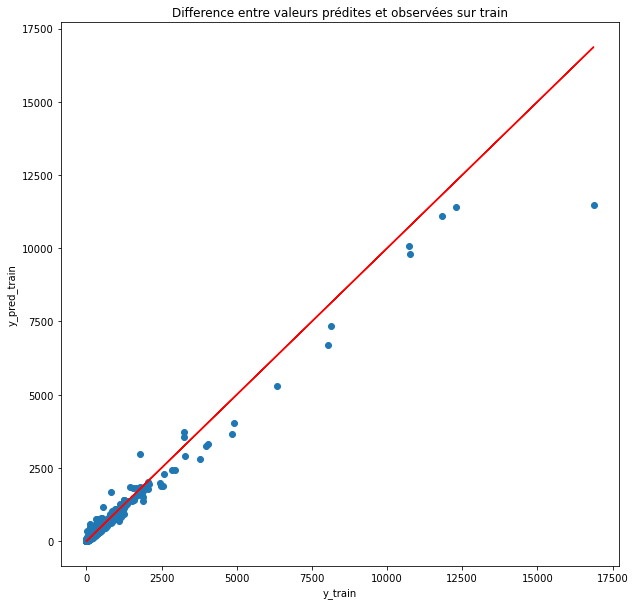

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_train, y_pred_train)
ax.plot(y_train, y_train, 'r')
plt.xlabel('y_train')
plt.ylabel('y_pred_train')
plt.title('Difference entre valeurs prédites et observées sur train')

plt.show()

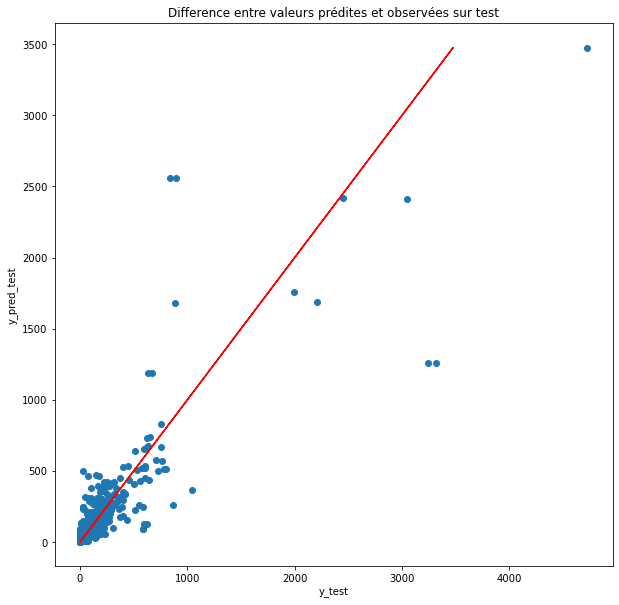

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred_test)
ax.plot(y_pred_test, y_pred_test, 'r')

plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Difference entre valeurs prédites et observées sur test')

plt.show()

___
### Evaluation / Comparaison des modèles
___

**Rapport de regression**

<AxesSubplot:title={'center':'Train - Rapport de regression'}>

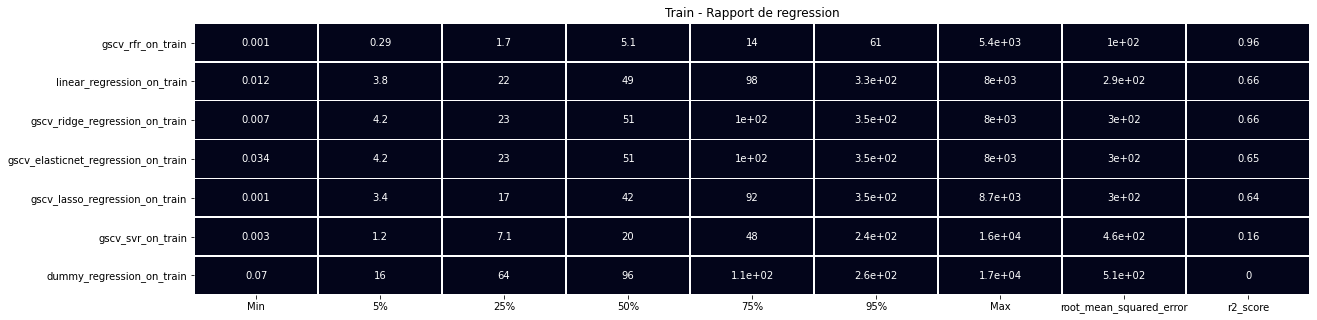

In [28]:
rr = regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Train - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

<AxesSubplot:title={'center':'Test - Rapport de regression'}>

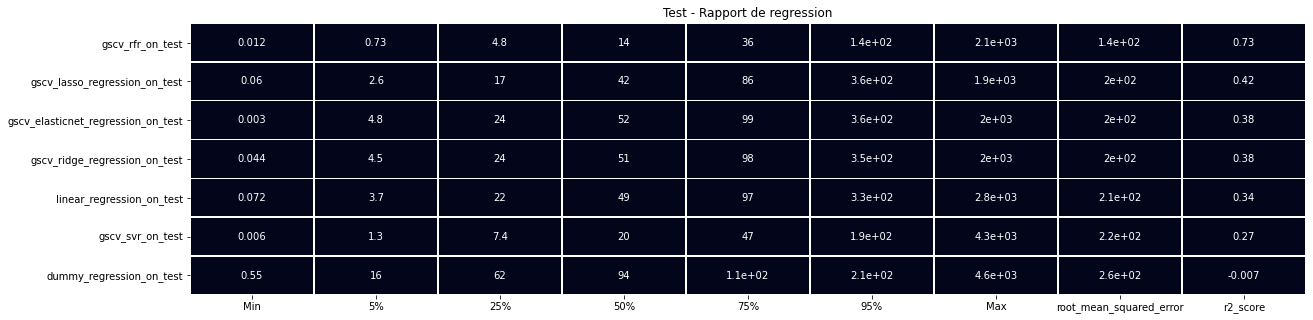

In [29]:
rr = regression_report[regression_report.index.str.contains('test$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Test - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

**Analyse des erreurs**

In [30]:
def get_errors(y_true,y_pred):    
    errors = y_pred-y_true
    errors_absolute = np.abs(errors)
    errors_relative= errors_absolute/np.abs(y_true)
    errors_normalized = errors/np.mean(y_true)

    data = {'y_true' : y_true ,
            'y_pred' : y_pred ,
            'errors' : errors,
            'errors_abs' : errors_absolute,
            'errors_normalized' : errors_normalized,
            'errors_relative' : errors_relative}
    
    return pd.DataFrame(data)

df_errors_train = get_errors(y_train,y_pred_train)

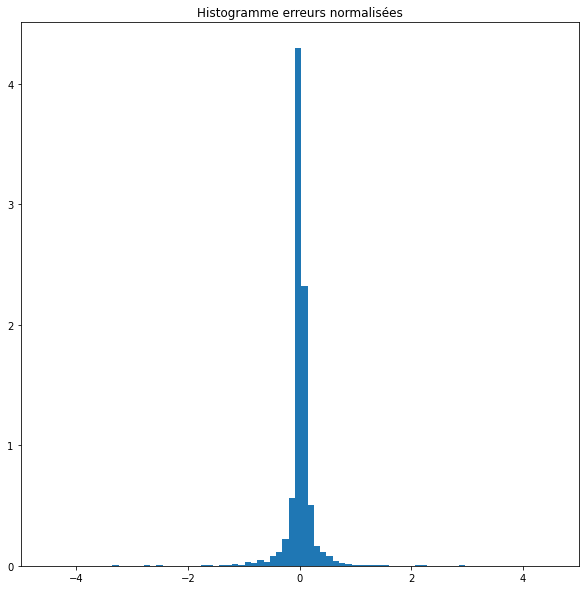

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-5,5 ])
ax.hist(df_errors_train['errors_normalized'], bins=500, density=True)

plt.title('Histogramme erreurs normalisées')
plt.show()

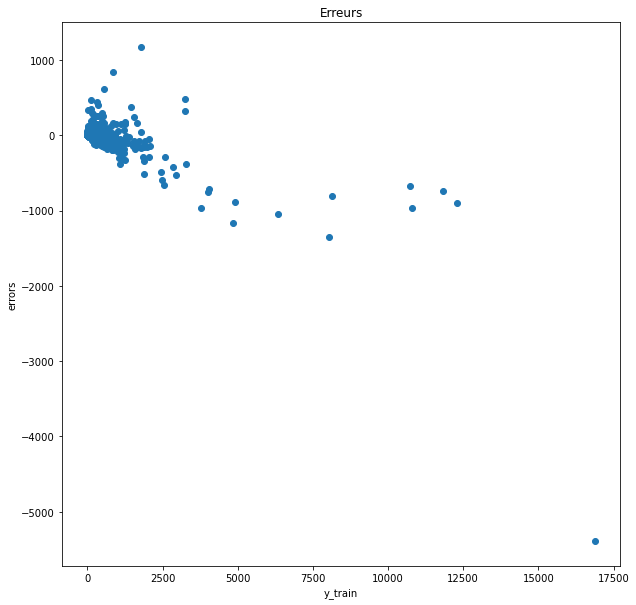

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_train, df_errors_train['errors'])
plt.xlabel('y_train')
plt.ylabel('errors')
plt.title('Erreurs')

plt.show()

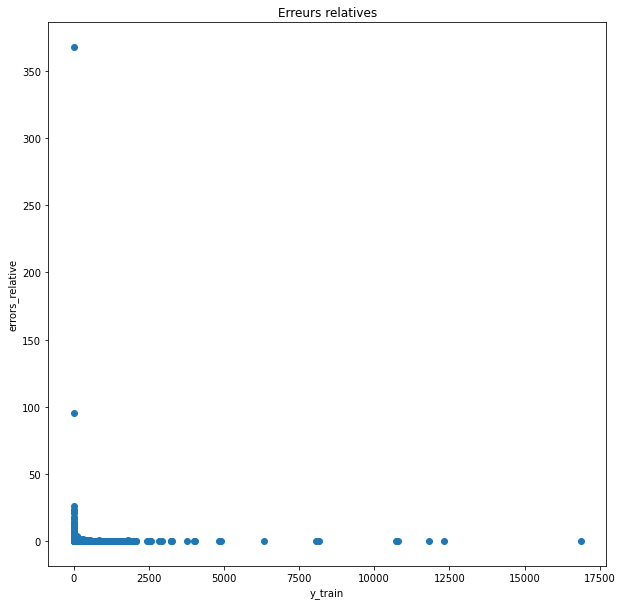

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_train, df_errors_train['errors_relative'])
plt.xlabel('y_train')
plt.ylabel('errors_relative')
plt.title('Erreurs relatives')

plt.show()

**Contraintes**

Temps d'execution : Inconnu   
Capacité de stockage : Inconnu

### Optimisation secondaire du meilleur modèle

Correlation et importance des variables dans les forets aléatoires

>Des simulations numériques confirment
d’une part les résultats theoriques et indiquent d’autre part que l’algorithme RFE tend a
selectionner un faible nombre de variables avec une bonne erreur de prédiction.

B.Gregorutti, B.Michel, P Saint-Pierre *Correlation et importance des variables dans les forets aléatoires* @Univ. Pierre et Marie Curie [source](http://papersjds14.sfds.asso.fr/submission_48.pdf)

**selection Recursive feature elimination**

In [34]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

n_features_max = X_train.shape[1]          
high_score=0

best_n=0           
score_list =[]
for n in range(1,n_features_max):
    best_estimator = gscv_rfr.best_estimator_
    rfe = RFE(best_estimator, n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    scores = cross_val_score(best_estimator, X_train_rfe, y_train, cv=5,scoring='r2')
    score = np.mean(scores)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        best_n = n
        
print(f"Optimum number of features: {best_n}")
print(f"Score with {best_n} features: {high_score}")

Optimum number of features: 54
Score with 54 features: 0.6671014618949723


In [35]:
best_rfe = RFE(best_estimator, n_features_to_select = best_n)
X_train_rfe = best_rfe.fit_transform(X_train,y_train)
X_test_rfe = best_rfe.transform(X_test)
best_estimator.fit(X_train_rfe,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [36]:
y_pred_train = best_estimator.predict(X_train_rfe)
y_pred_test = best_estimator.predict(X_test_rfe)
regression_report = regression_report.append(get_metrics(y_train, y_pred_train, 'best_estimator_on_train'))
regression_report = regression_report.append(get_metrics(y_test, y_pred_test, 'best_estimator_on_test'))

In [37]:
regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)

,Min,5%,25%,50%,75%,95%,Max,root_mean_squared_error,r2_score
gscv_rfr_on_train,0.001,0.291,1.714,5.071,13.757,61.316,5390.945,99.702,0.961
best_estimator_on_train,0.001,0.267,1.792,5.236,13.716,62.713,5564.061,100.705,0.960
linear_regression_on_train,0.012,3.770,21.971,49.178,98.183,330.454,8016.668,293.433,0.664
gscv_ridge_regression_on_train,0.007,4.178,23.124,51.075,101.958,349.962,7974.125,296.954,0.656
gscv_elasticnet_regression_on_train,0.034,4.179,23.138,51.461,102.030,351.960,7971.863,297.869,0.654
gscv_lasso_regression_on_train,0.001,3.376,16.993,42.127,92.139,352.967,8662.992,303.855,0.639
gscv_svr_on_train,0.003,1.193,7.134,19.795,48.447,244.858,16302.009,464.634,0.157
dummy_regression_on_train,0.070,16.299,63.828,95.985,110.438,258.864,16754.700,506.061,0.000


<AxesSubplot:title={'center':'Train - Rapport de regression'}>

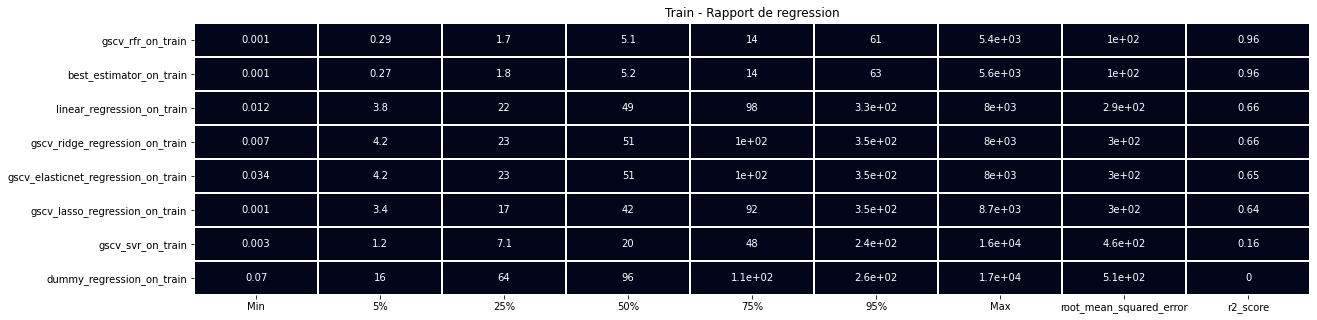

In [39]:
rr = regression_report[regression_report.index.str.contains('train$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Train - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)

In [38]:
regression_report[regression_report.index.str.contains('test$')].sort_values(by=['r2_score'], ascending=False)

,Min,5%,25%,50%,75%,95%,Max,root_mean_squared_error,r2_score
best_estimator_on_test,0.021,0.748,4.747,13.592,35.202,133.868,2073.264,130.503,0.747
gscv_rfr_on_test,0.012,0.731,4.771,13.611,35.684,135.126,2058.930,135.227,0.729
gscv_lasso_regression_on_test,0.060,2.571,16.528,41.871,85.758,361.447,1889.284,197.080,0.424
gscv_elasticnet_regression_on_test,0.003,4.769,23.673,51.573,98.676,355.469,1951.678,204.473,0.380
gscv_ridge_regression_on_test,0.044,4.494,23.560,51.382,97.875,350.759,1967.400,204.644,0.379
linear_regression_on_test,0.072,3.719,22.460,49.090,97.011,327.181,2796.531,210.512,0.343
gscv_svr_on_test,0.006,1.280,7.424,20.343,47.181,187.849,4267.128,221.972,0.269
dummy_regression_on_test,0.550,15.841,61.985,94.020,109.895,205.760,4609.150,260.589,-0.007


<AxesSubplot:title={'center':'Test - Rapport de regression'}>

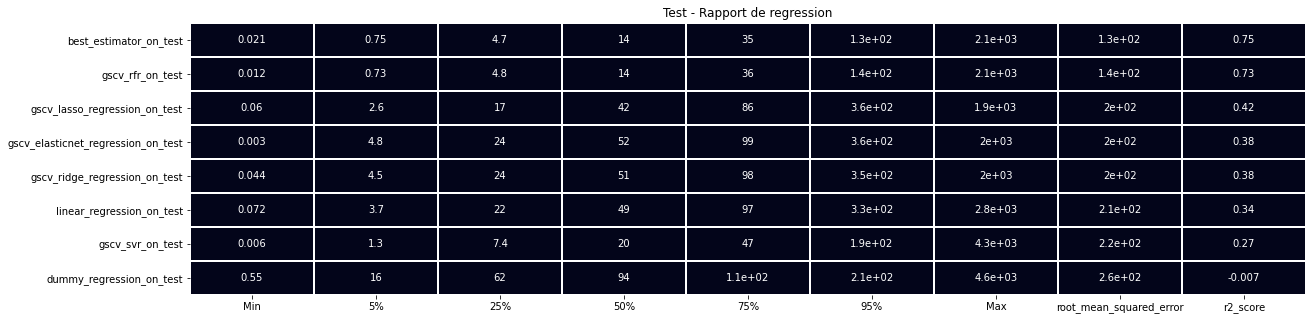

In [40]:
rr = regression_report[regression_report.index.str.contains('test$')].sort_values(by=['r2_score'], ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.title('Test - Rapport de regression')
sns.heatmap(rr,vmin=regression_report.max().Max,vmax=regression_report.max().Max, annot=True, cbar=None,linewidths=.5)